In [22]:
import os, sys
import pandas as pd
from pycaret.regression import *
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib widget
%matplotlib inline
%matplotlib ipympl
import warnings

In [24]:
dataset = pd.read_csv(r"C:\work\water_use\ml_experiments\annual_v_0_0\clean_train_db.csv")
pop_info = pd.read_csv(r"pop_info.csv")

In [25]:
pop_info['pop'] = pop_info['pop_swud16'].copy()
mask = pop_info['pop'].isna()
pop_info.loc[mask, 'pop'] = pop_info[mask]['plc_pop_interpolated']
mask = pop_info['pop'].isna()
pop_info.loc[mask, 'pop'] = pop_info[mask]['TPOPSRV']
mask = pop_info['pop'].isna()
pop_info.loc[mask, 'pop'] = pop_info[mask]['tract_pop']
np.any(pop_info['pop'].isna())

False

In [26]:
dataset = dataset[dataset['Ecode_num']==0]

In [27]:
pop_df = pop_info[['sys_id', 'pop', 'Year']]
dataset = dataset.merge(pop_df, right_on=['sys_id', 'Year'], left_on=['sys_id', 'Year'] , how = 'left')

In [28]:
dataset['pc'] = dataset['wu_rate']/dataset['pop']
dataset = dataset[dataset['pc'] > 1]
dataset = dataset[dataset['pc'] < 700]

In [29]:
dataset.columns

Index(['population', 'households2', 'income_lt_10k', 'income_10K_15k',
       'income_15k_20k', 'income_20k_25k', 'income_25k_30k', 'income_30k_35k',
       'income_35k_40k', 'income_40k_45k',
       ...
       'zill_nhouse', 'LotSizeSquareFeet_sum', 'YearBuilt_mean',
       'BuildingAreaSqFt_sum', 'TaxAmount_mean', 'NoOfStories_mean',
       'bdg_ftp_count', 'bdg_ftp_gt2median', 'pop', 'pc'],
      dtype='object', length=113)

In [30]:
arr2d = stats.binned_statistic_2d(dataset['LAT'],  dataset['LONG'], dataset['pc'], statistic='median', bins=50)

TypeError: Invalid shape (100,) for image data

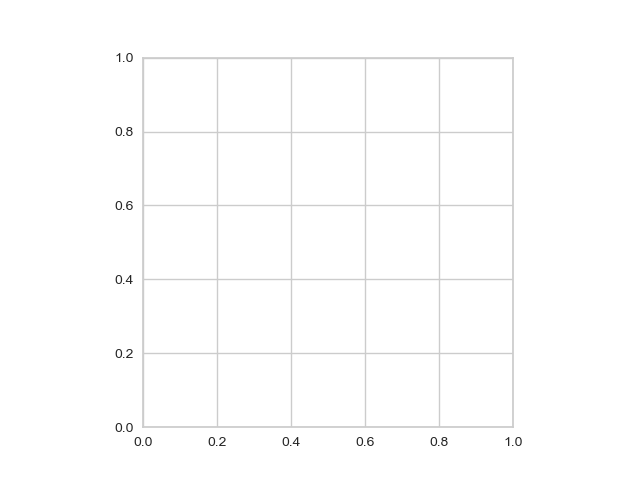

In [31]:
plt.imshow(arr.statistic, cmap = 'jet')
plt.colorbar()

In [32]:
plt.plot(arr.x_edge[1:], arr.statistic.T, c= [0.7,0.7,0.7])
plt.plot(arr.x_edge[1:], np.nanmean(arr.statistic, axis = 0))

AttributeError: 'BinnedStatisticResult' object has no attribute 'x_edge'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


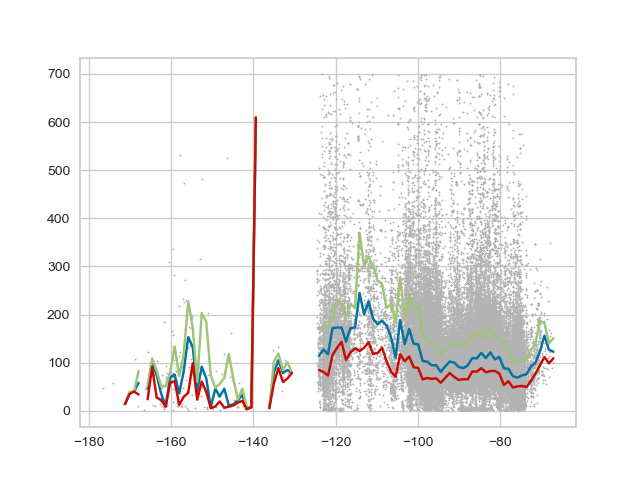

In [33]:
arr = stats.binned_statistic(dataset['LONG'],  dataset['pc'], statistic='mean', bins=100)
arr50 = stats.binned_statistic(dataset['LONG'],  dataset['pc'], statistic='median', bins=100)
arr95 = stats.binned_statistic(dataset['LONG'],  dataset['pc'], statistic=lambda y: np.percentile(y, 75), bins=100)
arr05 = stats.binned_statistic(dataset['LONG'],  dataset['pc'], statistic=lambda y: np.percentile(y, 25), bins=100)

plt.figure()
plt.scatter(dataset['LONG'],  dataset['pc'], s= 1, c = [0.7,0.7,0.7])
plt.plot(arr50.bin_edges[1:],arr50.statistic)
plt.plot(arr95.bin_edges[1:],arr95.statistic)
plt.plot(arr05.bin_edges[1:],arr05.statistic)

In [21]:
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(dataset['LONG'],  dataset['pc'], yerr=yerr, label='both limits (default)')


ValueError: 'yerr' (shape: (10,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (67617,))

In [ ]:
#plt.figure()
#sns.lineplot(data=dataset, x="LONG", y="pc")

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year', ylabel='passengers'>

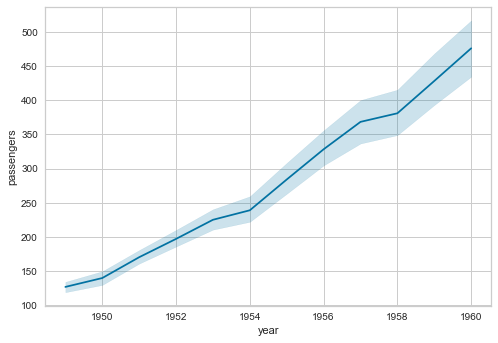

In [4]:
sns.lineplot(data=flights, x="year", y="passengers")

In [15]:
dd = dataset.sample(frac=0.1, replace=True, random_state=1)

<AxesSubplot:xlabel='LONG', ylabel='pc'>

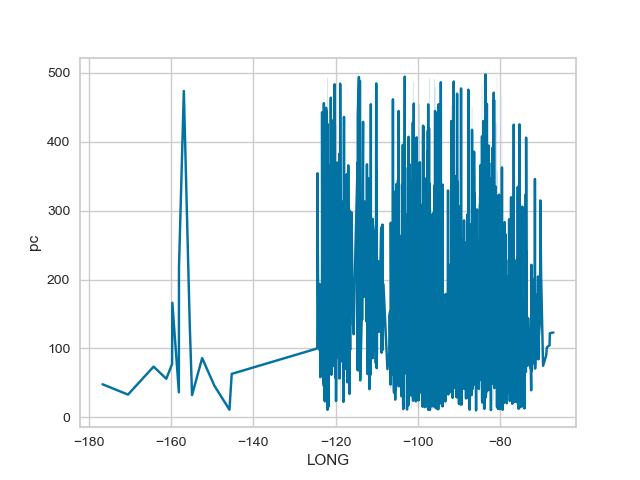

In [16]:
sns.lineplot(data=dd, x="LONG", y="pc")